In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('audio_meta.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head(3)

file  class_id  class  \
0  Emotions\Angry\03-01-05-01-01-01-01.wav         1  Angry   
1  Emotions\Angry\03-01-05-01-01-01-02.wav         1  Angry   
2  Emotions\Angry\03-01-05-01-01-01-03.wav         1  Angry   

                                               Xmfcc  
0  [-4.9088266e+02  5.4259251e+01 -7.4870567e+00 ...  
1  [-5.2676392e+02  5.2980289e+01 -1.3038193e+01 ...  
2  [-5.5453198e+02  7.5447372e+01  2.6228604e+00 ...

In [3]:
df['class'].value_counts()

class
Angry        2167
Happy        2167
Sad          2167
Fearful      2047
Disgusted    1863
Neutral      1795
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='class'>

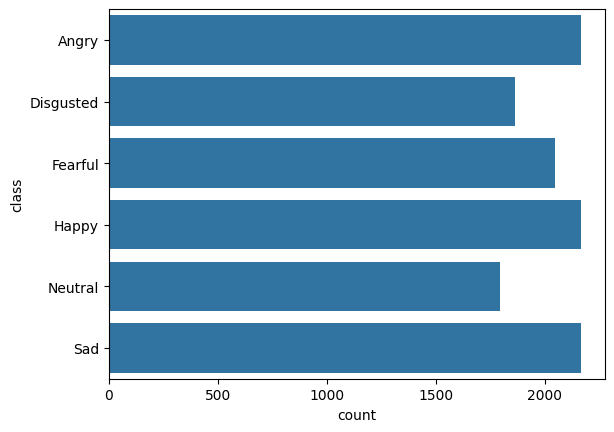

In [4]:
sns.countplot(df['class'])

In [5]:

df['class'].value_counts()

class
Angry        2167
Happy        2167
Sad          2167
Fearful      2047
Disgusted    1863
Neutral      1795
Name: count, dtype: int64

In [6]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion ,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

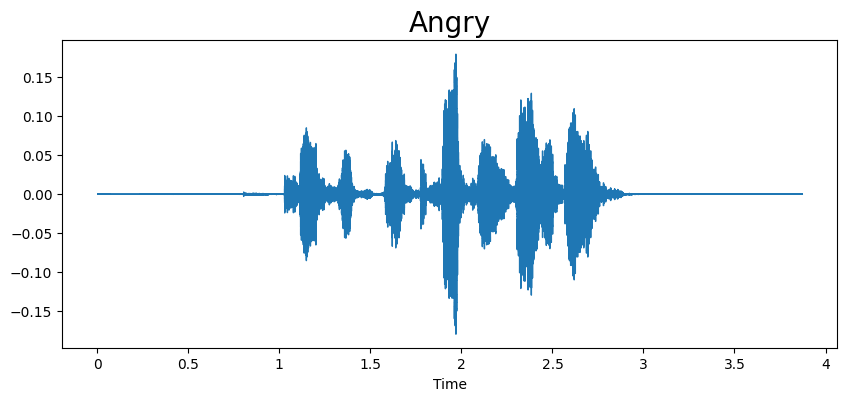

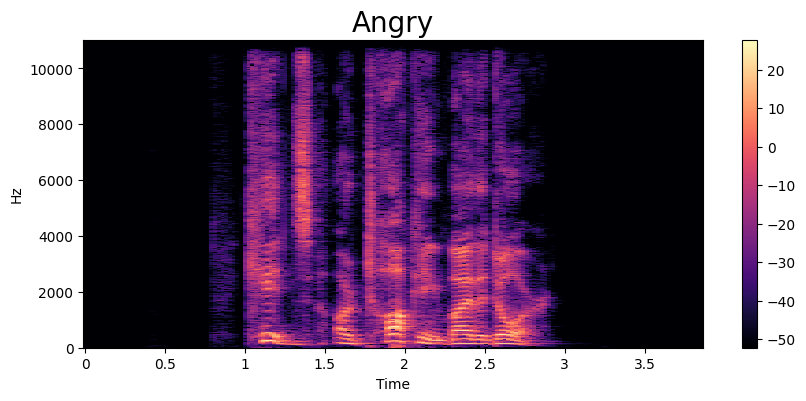

In [10]:
emotion = 'Angry'
path = 'Emotions/Angry/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

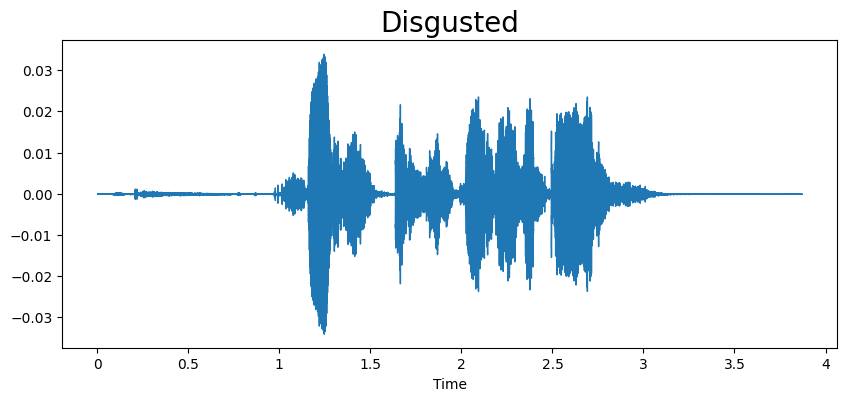

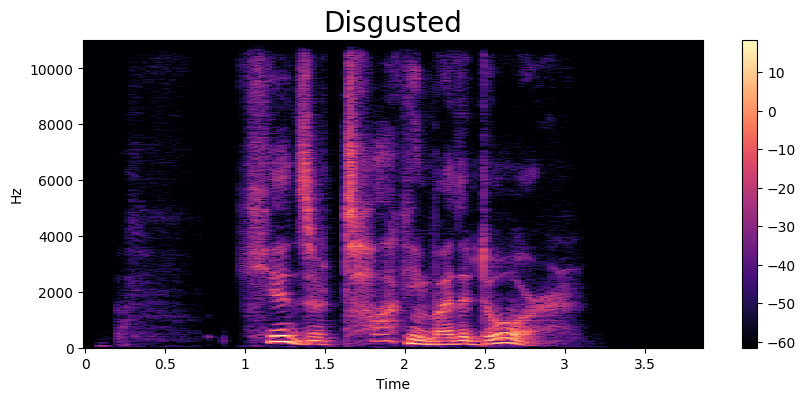

In [11]:
emotion = 'Disgusted'
path = 'Emotions/Disgusted/03-01-07-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

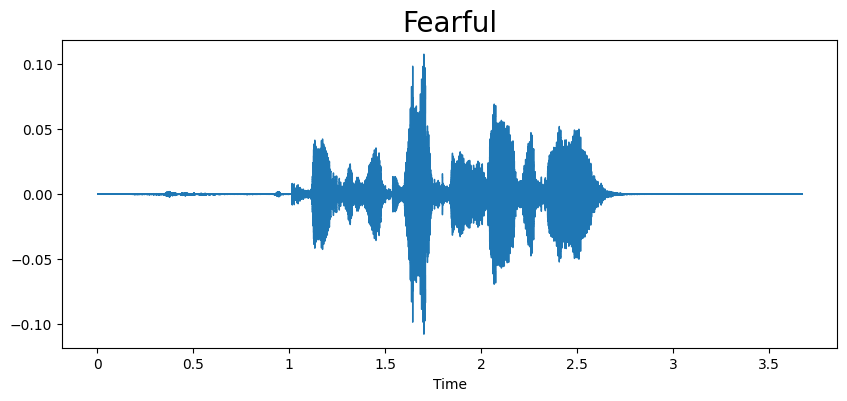

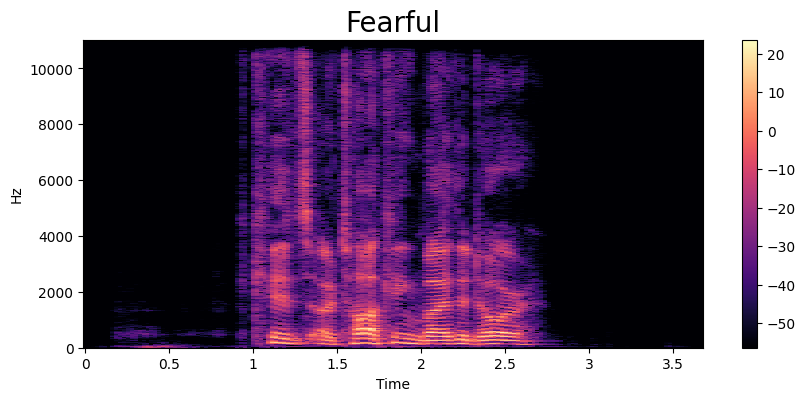

In [12]:
emotion = 'Fearful'
path = 'Emotions/Fearful/03-01-06-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


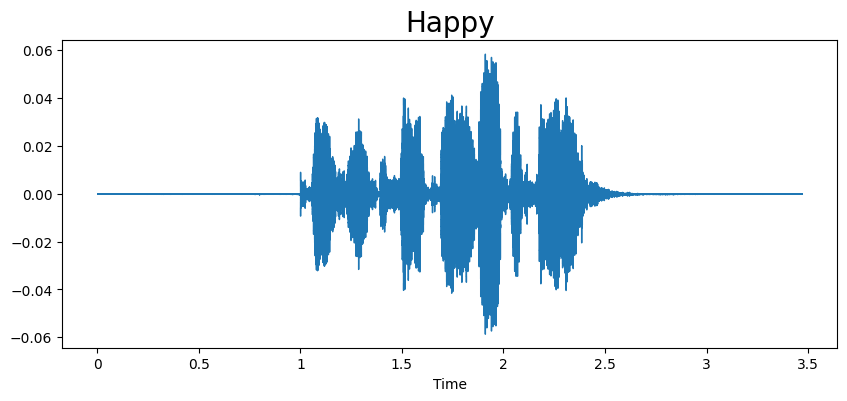

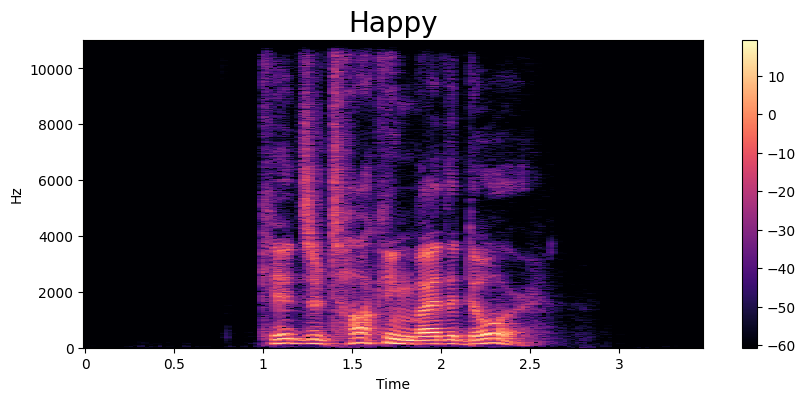

In [13]:
emotion = 'Happy'
path = 'Emotions/Happy/03-01-03-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


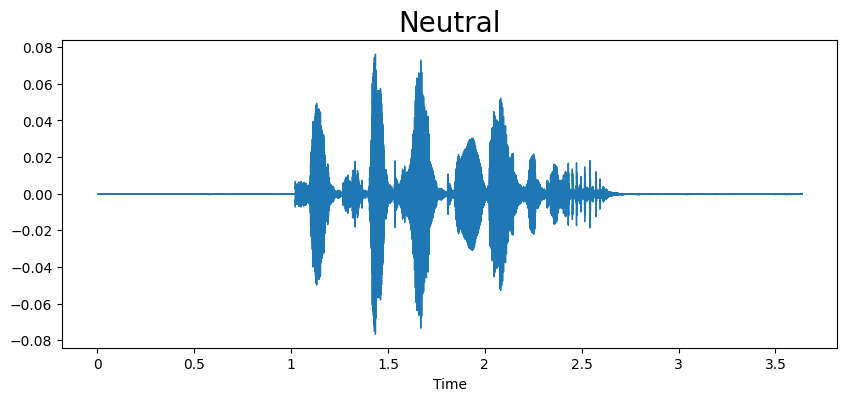

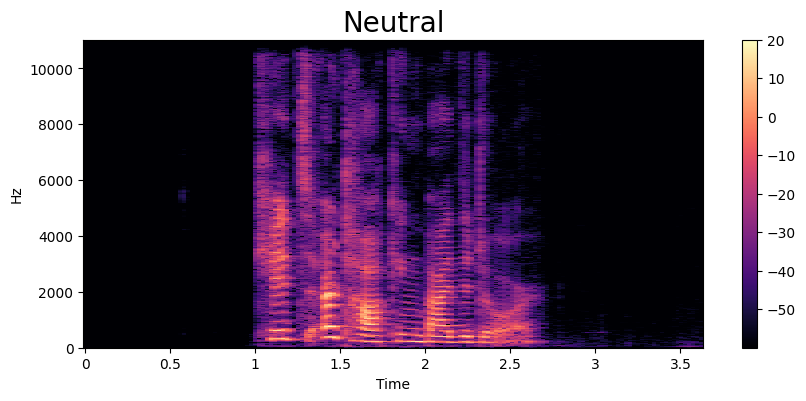

In [14]:
emotion = 'Neutral'
path = 'Emotions/Neutral/03-01-01-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

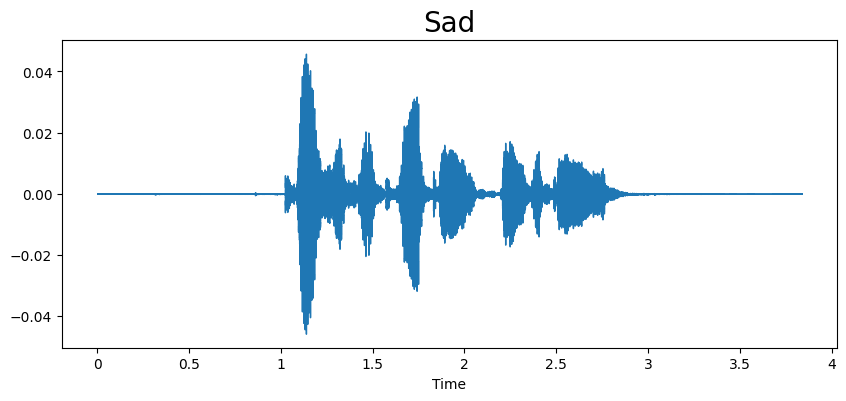

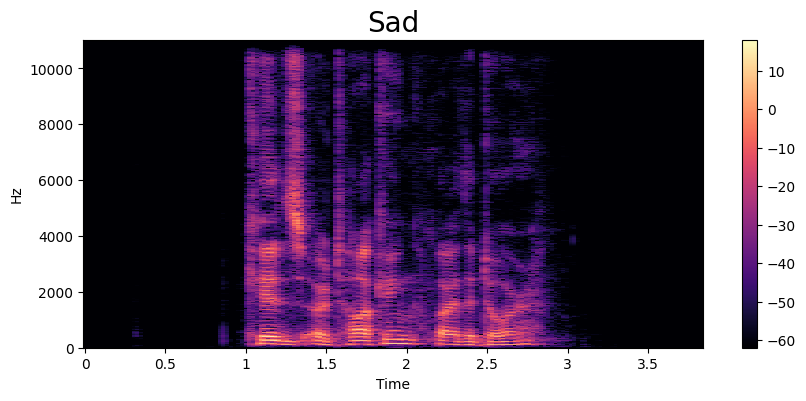

In [15]:
emotion = 'Sad'
path = 'Emotions/Sad/03-01-04-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
X_mfcc = df['file'].apply(lambda x: extract_mfcc(x))
X_mfcc

0        [-490.88266, 54.25925, -7.4870563, 15.928641, ...
1        [-526.7639, 52.98029, -13.038193, 7.258232, -7...
2        [-554.532, 75.44737, 2.62286, 20.056547, 4.767...
3        [-521.82367, 42.11239, -13.007957, 4.1676183, ...
4        [-471.8216, 73.18985, -17.26226, 8.15322, 6.64...
                               ...                        
12201    [-406.48053, 80.379875, 32.462395, 46.579094, ...
12202    [-426.90918, 102.54756, 24.800041, 43.048096, ...
12203    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
12204    [-434.8618, 89.906364, 28.373262, 39.577065, -...
12205    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: file, Length: 12206, dtype: object

In [22]:
X1 = [x for x in X_mfcc]
X1 = np.array(X1)
X1

array([[-4.9088266e+02,  5.4259251e+01, -7.4870563e+00, ...,
        -4.7193137e-01, -4.5563006e+00, -1.5693077e+00],
       [-5.2676392e+02,  5.2980289e+01, -1.3038193e+01, ...,
         1.7093302e+00,  6.4148962e-01,  9.3507594e-01],
       [-5.5453198e+02,  7.5447372e+01,  2.6228600e+00, ...,
        -3.2926993e+00, -5.5480242e+00, -2.1736970e+00],
       ...,
       [-3.7850494e+02,  8.0910622e+01,  3.5300533e+01, ...,
         6.4638786e+00,  4.5451479e+00,  7.0439348e+00],
       [-4.3486179e+02,  8.9906364e+01,  2.8373262e+01, ...,
         1.0526768e+01,  1.1808918e+01,  1.0119672e+01],
       [-4.2183411e+02,  7.0697884e+01,  3.2476387e+01, ...,
         5.0802121e+00,  5.1315765e+00,  6.3598347e+00]], dtype=float32)

In [23]:
X1 = [x for x in X_mfcc]
X1 = np.array(X1)
X1

array([[-4.9088266e+02,  5.4259251e+01, -7.4870563e+00, ...,
        -4.7193137e-01, -4.5563006e+00, -1.5693077e+00],
       [-5.2676392e+02,  5.2980289e+01, -1.3038193e+01, ...,
         1.7093302e+00,  6.4148962e-01,  9.3507594e-01],
       [-5.5453198e+02,  7.5447372e+01,  2.6228600e+00, ...,
        -3.2926993e+00, -5.5480242e+00, -2.1736970e+00],
       ...,
       [-3.7850494e+02,  8.0910622e+01,  3.5300533e+01, ...,
         6.4638786e+00,  4.5451479e+00,  7.0439348e+00],
       [-4.3486179e+02,  8.9906364e+01,  2.8373262e+01, ...,
         1.0526768e+01,  1.1808918e+01,  1.0119672e+01],
       [-4.2183411e+02,  7.0697884e+01,  3.2476387e+01, ...,
         5.0802121e+00,  5.1315765e+00,  6.3598347e+00]], dtype=float32)

In [24]:
mfcc = pd.DataFrame(X1,columns=[x for x in range(1,41)])
mfcc

1           2          3          4          5          6   \
0     -490.882660   54.259251  -7.487056  15.928641  -1.853972  -3.762017   
1     -526.763916   52.980289 -13.038193   7.258232  -7.994300  -5.933784   
2     -554.531982   75.447372   2.622860  20.056547   4.767844  -3.949522   
3     -521.823669   42.112389 -13.007957   4.167618 -11.537407  -9.458173   
4     -471.821594   73.189850 -17.262260   8.153220   6.645729 -17.770741   
...           ...         ...        ...        ...        ...        ...   
12201 -406.480530   80.379875  32.462395  46.579094  -1.683400  13.425336   
12202 -426.909180  102.547562  24.800041  43.048096   4.635152   1.589418   
12203 -378.504944   80.910622  35.300533  39.747921  -4.786336   7.230661   
12204 -434.861786   89.906364  28.373262  39.577065  -2.448975  17.433895   
12205 -421.834106   70.697884  32.476387  45.642555   4.728805   9.999077   

             7          8          9          10  ...        31         32  \
0     -5.567190  -1.998039 -15.838935  -6.187402  ...  0.028552  -0.560546   
1     -4.651824 -12.674568  -5.665134  -2.909221  ... -1.372314   3.370533   
2     -8.300060 -12.239655  -6.985274  -5.187912  ... -1.667873  -1.667470   
3     -9.039138 -16.746555 -10.106771  -6.264058  ...  1.201717   1.897936   
4     -6.850997  -4.655056 -10.153034  -6.864321  ...  0.821179   1.407524   
...         ...        ...        ...        ...  ...       ...        ...   
12201  3.121954 -12.444939   1.779503  -3.669046  ...  0.664780   9.923698   
12202 -3.913076 -16.237940   3.517753 -13.348095  ... -6.544245   3.926088   
12203  2.237550 -10.493016   3.315185  -7.648578  ...  2.555938  11.403854   
12204 -0.950397 -15.767815  -0.184668  -4.836698  ...  3.281015  11.347349   
12205  0.001412 -12.394684   2.192089  -9.377081  ... -3.816141   8.728758   

             33         34        35         36         37         38  \
0     -2.765480  -2.210116 -3.227792  -0.030124  -1.744964  -0.471931   
1      2.566688   3.450167  0.546662   1.748658  -1.036299   1.709330   
2     -4.225702  -1.124747 -3.251144   0.083114  -4.654759  -3.292699   
3      0.604426  -0.122943 -1.261978   0.337491  -0.585459   2.400822   
4     -1.147368   0.730866 -0.709438   3.432853  -0.580452  -0.899357   
...         ...        ...       ...        ...        ...        ...   
12201  6.552720  11.472417  3.039587   4.530210   1.182842   5.800232   
12202  0.441222   7.130211  9.293227  11.191388  11.764185  11.832009   
12203  7.274486   8.324023  0.578673   2.331598  -2.193613   6.463879   
12204  6.455436  12.226358  4.241483   4.372067   5.561800  10.526768   
12205  4.773239  13.040384  6.652516   7.749924   5.421149   5.080212   

              39         40  
0      -4.556301  -1.569308  
1       0.641490   0.935076  
2      -5.548024  -2.173697  
3       2.955410   1.315660  
4      -3.205489   0.345790  
...          ...        ...  
12201   5.091354   6.772975  
12202   8.662523   8.261908  
12203   4.545148   7.043935  
12204  11.808918  10.119672  
12205   5.131577   6.359835  

[12206 rows x 40 columns]

In [25]:
mfcc.shape

(12206, 40)

In [26]:
X1 = np.expand_dims(mfcc,-1)
X1.shape

(12206, 40, 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['class']])
y = y.toarray()
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [28]:
from sklearn.model_selection import train_test_split
X1_train, X1_test,y1_train, y1_test = train_test_split(X1,y,
                                   random_state=5, 
                                   test_size=0.20, 
                                   shuffle=True)
X1_train.shape,y1_train.shape


((9764, 40, 1), (9764, 6))

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


model = Sequential([
    LSTM(40, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40)                  │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,502 (87.90 KB)

 Trainable params: 22,502 (87.90 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X1_train, y1_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.1726 - loss: 1.7893 - val_accuracy: 0.2376 - val_loss: 1.7488
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2360 - loss: 1.7242 - val_accuracy: 0.2898 - val_loss: 1.6340
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2690 - loss: 1.6542 - val_accuracy: 0.3559 - val_loss: 1.5476
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3425 - loss: 1.5702 - val_accuracy: 0.3733 - val_loss: 1.5039
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.3696 - loss: 1.5180 - val_accuracy: 0.4050 - val_loss: 1.4338
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3950 - loss: 1.4574 - val_accuracy: 0.4296 - val_loss: 1.3794
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4034 - loss: 1.4454 - val_accuracy: 0.4255 - val_loss: 1.3739
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4151 - loss: 1.4103 - val_acc

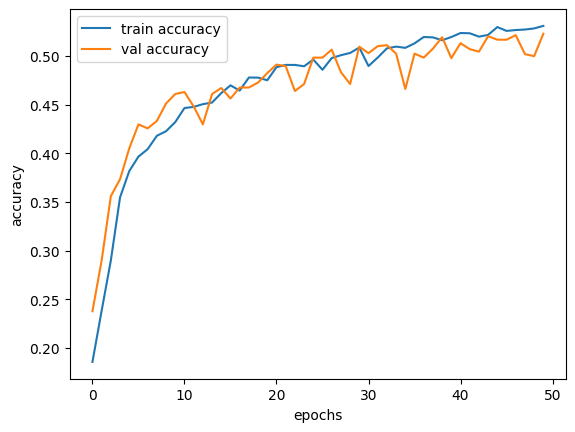

In [31]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

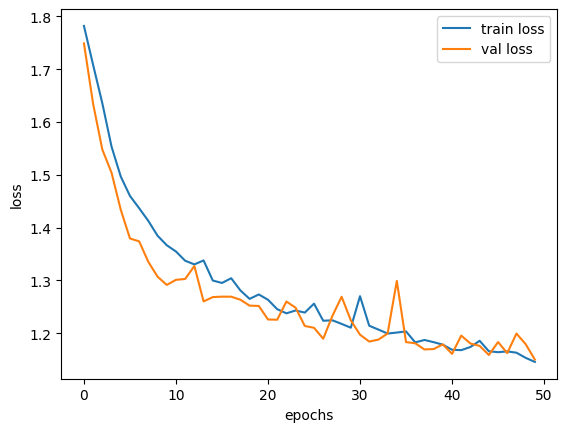

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()